# Data loading

[ Info: reading /scratch/ns59/HiQGA.jl/ASEG_Hobart_Workshop_2024/UDF_data/twolines.dat
[ Info: reading /scratch/ns59/HiQGA.jl/ASEG_Hobart_Workshop_2024/UDF_data/electronics_halt.jl
[ Info: read 274 out of 2600
[ Info: read 559 out of 2600
[ Info: read 846 out of 2600
[ Info: read 1131 out of 2600
[ Info: read 1417 out of 2600
[ Info: read 1703 out of 2600
[ Info: read 1990 out of 2600
[ Info: read 2275 out of 2600
[ Info: read 2562 out of 2600


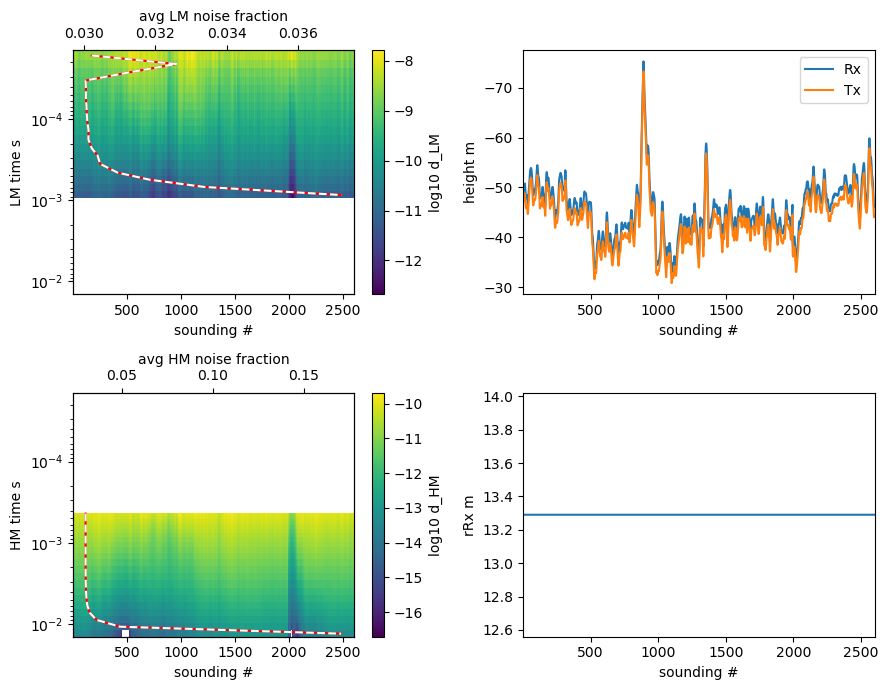

In [5]:
# info to read data
cd(@__DIR__)
# datafile
fname_dat = "/scratch/ns59/HiQGA.jl/ASEG_Hobart_Workshop_2024/UDF_data/twolines.dat"
# electronics file
fname_specs_halt = "/scratch/ns59/HiQGA.jl/ASEG_Hobart_Workshop_2024/UDF_data/electronics_halt.jl"
# column numbers from hdr file
X, Y, Z = 1, 2, 3
fid = 73
linenum = 72
frame_height = 4
frame_dx = 5
frame_dy = 6
frame_dz = 7
LM_Z = [16, 33]
HM_Z = [49, 71]
relerror = false
units = 1e-12
# load the data
using HiQGA.transD_GP
soundings = transD_GP.SkyTEM1DInversion.read_survey_files(fname_dat = fname_dat,
								fname_specs_halt = fname_specs_halt,
								LM_Z             = LM_Z,
								HM_Z             = HM_Z,
								frame_height     = frame_height,
								frame_dz         = frame_dz,
								frame_dy         = frame_dy,
								frame_dx         = frame_dx,
								X                = X,
								Y                = Y,
								Z                = Z,
								fid              = fid,
								units            = units,
								relerror         = relerror,
								linenum          = linenum,
								startfrom        = 1,
								skipevery        = 1, # all soundings
								dotillsounding   = nothing,
								makeqcplots      = true);

# Occam's inversion

In [6]:
# make gradient inversion options same for all soundings
σstart, σ0         = -2, -2
zfixed             = [-1e5]
ρfixed             = [1e12]
zstart             = 0.0
extendfrac         = 1.06
dz                 = 1.5
ρbg                = 10
nlayers            = 50
modelprimary       = false
regtype            = :R1
nstepsmax          = 40
ntries             = 10
target             = nothing
lo                 = -3. # log 10 S/m
hi                 = 1.  # log 10 S/m
λ²min              = -0.5
λ²max              = 8
λ²frac             = 4
# β² has been pre-run for 0.1 or 0.01
β²                 = 0.1
knownvalue         = 0.7
breakonknown       = true
prerun_dir         = "/scratch/ns59/HiQGA.jl/ASEG_Hobart_Workshop_2024/UDF_deterministic"
zipsaveprefix      = joinpath(prerun_dir, "UDF_deterministic_β²_$(β²)_$(regtype)_bg_$(round(10. ^σ0, sigdigits=4))_Spm")
# to help with next part
using Random; Random.seed!(15)

TaskLocalRNG()

# Create an AEM operator

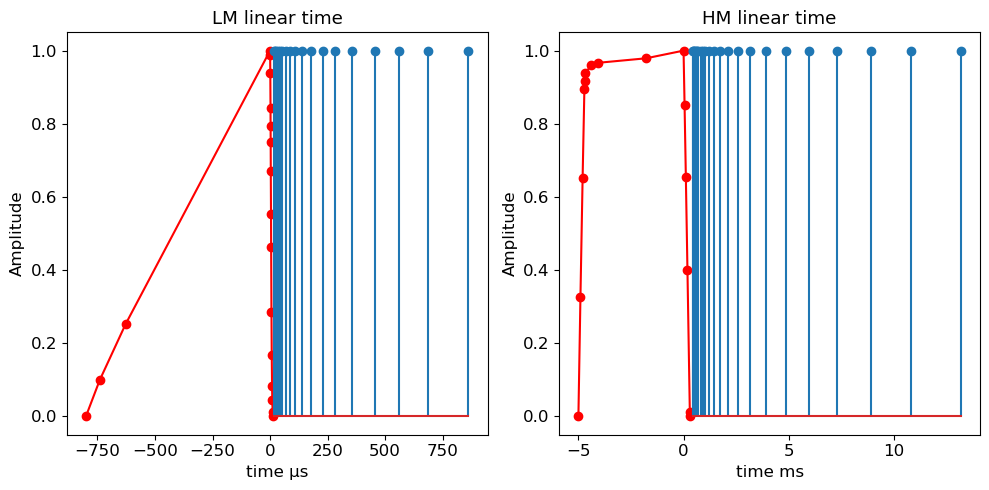

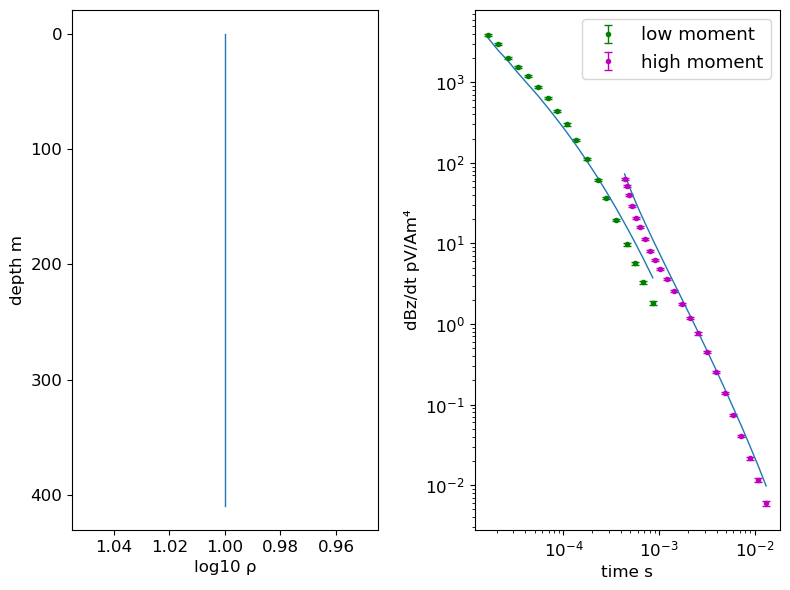

In [7]:
aem, zall, = transD_GP.SkyTEM1DInversion.makeoperator(
    soundings[rand(1:length(soundings))];
    zfixed, ρfixed, zstart, extendfrac, calcjacobian=true,
    dz, ρbg, nlayers, plotfield=true);

# Plot the results

idspec = idx[doesmatch] = [200, 1700]


[ Info: 100401
[ Info: X, Y = 154579.83, 6.47421801e6
[ Info: X, Y = 141939.62, 6.49232082e6
[ Info: ϕd is 1.0
[ Info: ϕd is 1.0


idspec = idx[doesmatch] = [300]


[ Info: 100502
[ Info: X, Y = 157240.61, 6.47916356e6
[ Info: ϕd is 1.0


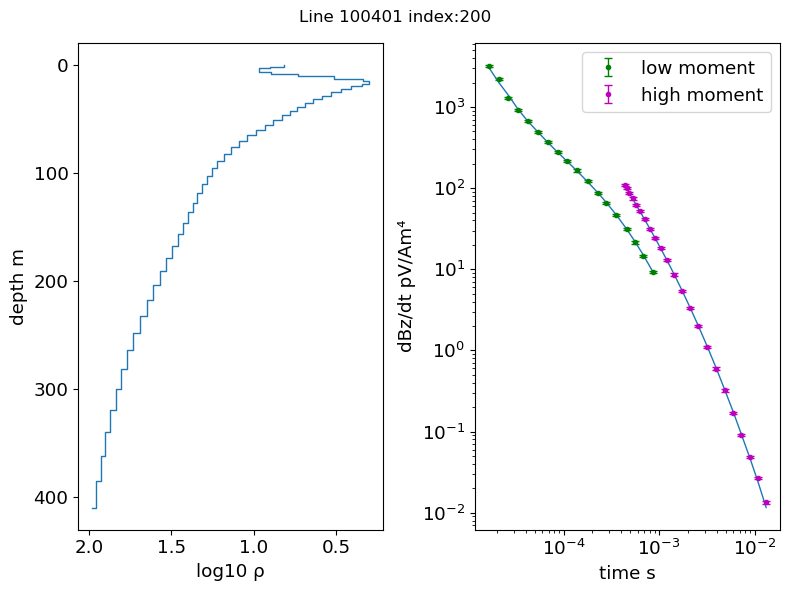

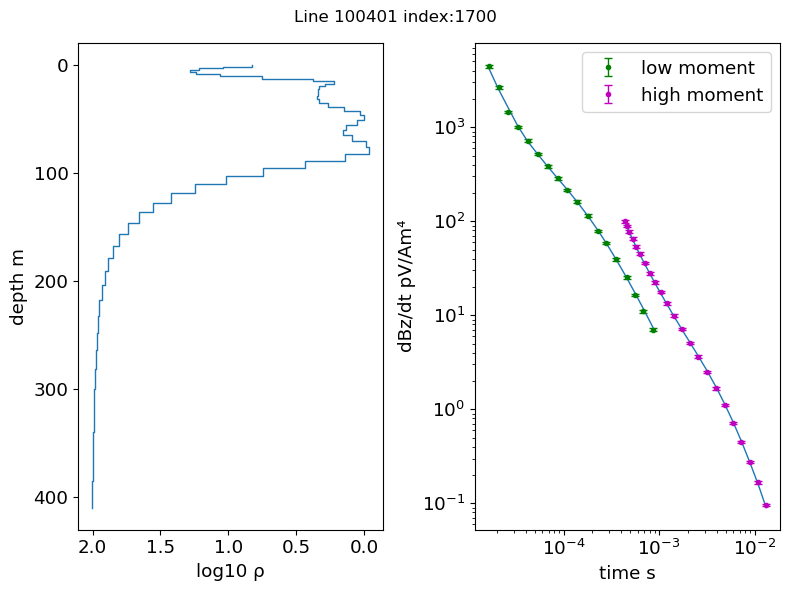

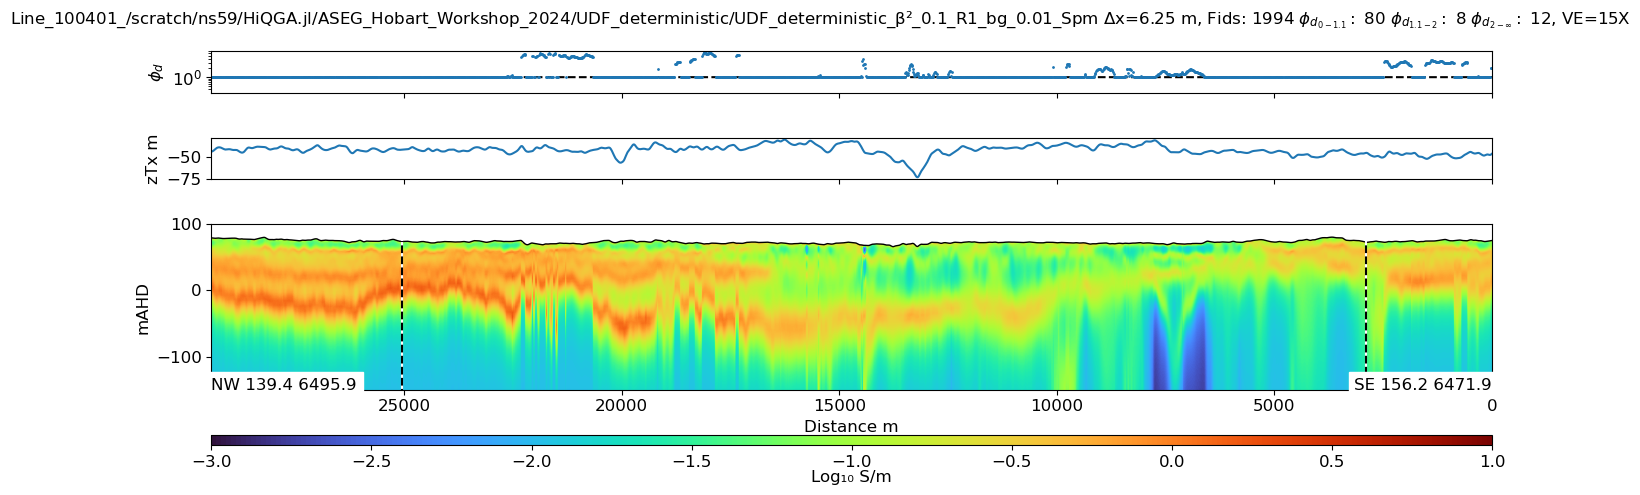

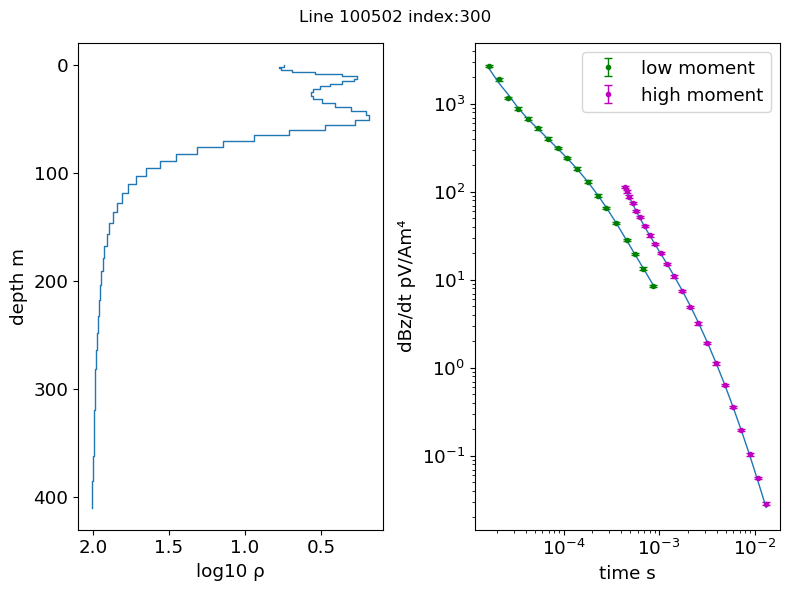

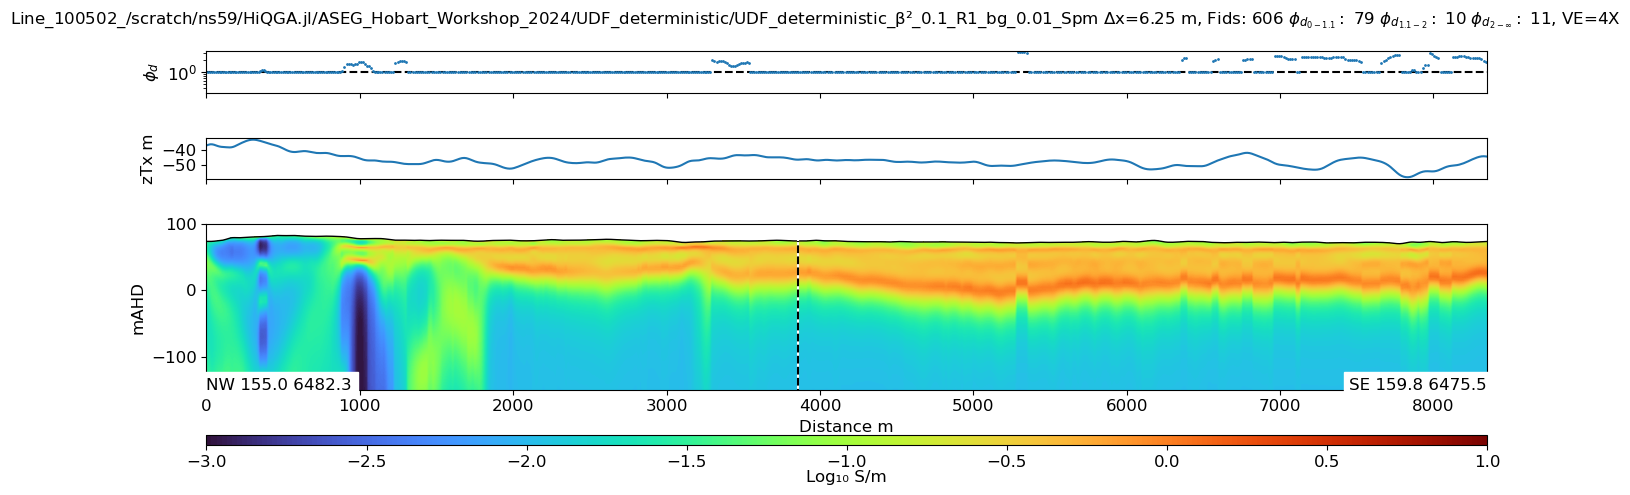

In [8]:
# lines to plot
lnames = [100401, 100502]
# sounding index to plot per line
idx = [[200, 1700],[300]]
# interpolation spacing
dr = 6.25
# do it
transD_GP.plotconvandlast(soundings, dr, dz; zall, lnames, idx,
  plotforward=true, aem_in=aem, prefix=zipsaveprefix,
  figsize=(14,5), vmin=lo, vmax=hi, postfix=zipsaveprefix, yl=[-150, 100],
  preferEright=true, showplot=true, logscale=true, saveplot=false)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*